# Integration of SQL in Python

Integrating SQL (Structured Query Language) with Python involves connecting your Python code to a database, enabling you to perform database operations like querying, inserting, updating, and deleting data directly from your Python scripts. This integration offers a powerful combination of Python's data analysis capabilities and SQL's structured data management strengths.



There are Two Approches to Connect MySQl Database to Python. 
1. mysql-connector-python 
2. pymysql

* To Connect SQL in python the first thing we need to install the mysql-connector-python Library so we can connect it to our SQL server.

In [2]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
#!pip install mysql-connector-python     


In [4]:
import mysql.connector #importing the Connector which we have downloded.

In [5]:
mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Mysql1234',
)                                # with the help of Connector establishing a Connection with the SQL server

In [6]:
cur = mydb.cursor()   #cursor will work as an cursor in the SQL database or a pointer.

* cursor work as an Object so to see the out-puts we will need a iterator that's why need to use a loop.


### cheking for the Databases.

In [7]:
cur.execute("show databases")

In [8]:
for i in cur:
    print(i)

('classicmodels',)
('ecommerce',)
('information_schema',)
('mysql',)
('performance_schema',)
('sys',)


* we need to run loop becasue we need to print each and every value that meets the sql query or condition

# Checking tables in database

In [9]:
cur.execute("SHOW TABLES FROM ecommerce")

In [10]:
for i in cur:
    print(i)

('categories',)
('customers',)
('order_items',)
('orders',)
('products',)
('shipping_details',)


In [11]:
mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Mysql1234',
    database = 'ecommerce'
)     # when you pass the Database it will use/ Connect the database for ex - e-commerce.

#### Using Where Clause 

In [12]:
import mysql.connector

# Database connection details
mydb = mysql.connector.connect(
   host = 'localhost',
    user = 'root',
    password = 'Mysql1234',
    database = 'classicmodels'
    )

mycursor = mydb.cursor()

# Sample SQL query
sql = "SELECT * FROM customers WHERE city = 'London'"

try:
    mycursor.execute(sql)
    myresult = mycursor.fetchall()

    # Print results
    # we need to run loop becasue we need to print each and every value that meets the sql query or condition
    for row in myresult:
        print(row)

except mysql.connector.Error as err:
    print("Error:", err)

finally:
    mycursor.close()
    mydb.close()

(324, 'Stylish Desk Decors, Co.', 'Brown', 'Ann ', '(171) 555-0297', '35 King George', None, 'London', None, 'WX3 6FW', 'UK', 1501, Decimal('77000.00'))
(489, 'Double Decker Gift Stores, Ltd', 'Smith', 'Thomas ', '(171) 555-7555', '120 Hanover Sq.', None, 'London', None, 'WA1 1DP', 'UK', 1501, Decimal('43300.00'))


In [13]:
myresult = pd.DataFrame(myresult)


In [14]:
myresult 

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,324,"Stylish Desk Decors, Co.",Brown,Ann,(171) 555-0297,35 King George,None,London,None,WX3 6FW,UK,1501,77000.00
1,489,"Double Decker Gift Stores, Ltd",Smith,Thomas,(171) 555-7555,120 Hanover Sq.,None,London,None,WA1 1DP,UK,1501,43300.00


#### Using Order BY 

In [15]:
import mysql.connector

mydb = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    password = 'Mysql1234',
    database = 'classicmodels'
    )

mycursor = mydb.cursor()

# Sort customers by name in descending order
sql = "SELECT * FROM customers ORDER BY customerName ASC"

try:
    mycursor.execute(sql)
    myresult = mycursor.fetchall()

    for row in myresult:
        print(row)

except mysql.connector.Error as err:
    print("Error:", err)

finally:
    mycursor.close()
    mydb.close()

(242, 'Alpha Cognac', 'Roulet', 'Annette ', '61.77.6555', '1 rue Alsace-Lorraine', None, 'Toulouse', None, '31000', 'France', 1370, Decimal('61100.00'))
(168, 'American Souvenirs Inc', 'Franco', 'Keith', '2035557845', '149 Spinnaker Dr.', 'Suite 101', 'New Haven', 'CT', '97823', 'USA', 1286, Decimal('0.00'))
(249, 'Amica Models & Co.', 'Accorti', 'Paolo ', '011-4988555', 'Via Monte Bianco 34', None, 'Torino', None, '10100', 'Italy', 1401, Decimal('113000.00'))
(237, 'ANG Resellers', 'Camino', 'Alejandra ', '(91) 745 6555', 'Gran Vía, 1', None, 'Madrid', None, '28001', 'Spain', None, Decimal('0.00'))
(276, "Anna's Decorations, Ltd", "O'Hara", 'Anna', '02 9936 8555', '201 Miller Street', 'Level 15', 'North Sydney', 'NSW', '2060', 'Australia', 1611, Decimal('107800.00'))
(465, 'Anton Designs, Ltd.', 'Anton', 'Carmen', '+34 913 728555', 'c/ Gobelas, 19-1 Urb. La Florida', None, 'Madrid', None, '28023', 'Spain', None, Decimal('0.00'))
(206, 'Asian Shopping Network, Co', 'Walker', 'Brydey', 

In [16]:
myresult = pd.DataFrame(myresult)


In [17]:
myresult

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,242,Alpha Cognac,Roulet,Annette,61.77.6555,1 rue Alsace-Lorraine,None,Toulouse,None,31000,France,1370.0,61100.00
1,168,American Souvenirs Inc,Franco,Keith,2035557845,149 Spinnaker Dr.,Suite 101,New Haven,CT,97823,USA,1286.0,0.00
2,249,Amica Models & Co.,Accorti,Paolo,011-4988555,Via Monte Bianco 34,None,Torino,None,10100,Italy,1401.0,113000.00
3,237,ANG Resellers,Camino,Alejandra,(91) 745 6555,"Gran Vía, 1",None,Madrid,None,28001,Spain,NaN,0.00
4,276,"Anna's Decorations, Ltd",O'Hara,Anna,02 9936 8555,201 Miller Street,Level 15,North Sydney,NSW,2060,Australia,1611.0,107800.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,298,"Vida Sport, Ltd",Holz,Mihael,0897-034555,Grenzacherweg 237,None,Genève,None,1203,Switzerland,1702.0,141300.00
118,181,Vitachrome Inc.,Frick,Michael,2125551500,2678 Kingston Rd.,Suite 101,NYC,NY,10022,USA,1286.0,76400.00
119,144,"Volvo Model Replicas, Co",Berglund,Christina,0921-12 3555,Berguvsvägen 8,None,Luleå,None,S-958 22,Sweden,1504.0,53100.00
120,459,Warburg Exchange,Ottlieb,Sven,0241-039123,Walserweg 21,None,Aachen,None,52066,Germany,NaN,0.00


In [18]:
mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Mysql1234',
    database = 'ecommerce'
)  

In [19]:
cur = mydb.cursor()

In [20]:
cur.execute("Select * from Categories ")

In [21]:
for i in cur:
    print(i)

(1, 'Electronics')
(2, 'Clothing')
(3, 'Books')
(4, 'Furniture')
(5, 'Toys')
(6, 'Sports')
(7, 'Beauty')
(8, 'Food')
(9, 'Accessories')
(10, 'Home Decor')


In [22]:
cur.execute('select * from Products')

In [23]:
for i in cur:
    print(i)

(1, 'Laptop', '15-inch, Core i7, 16GB RAM', Decimal('99999.99'), 50, 1)
(2, 'Laptop', '13.5-inch, Core i5, 16GB RAM', Decimal('69990.99'), 1, 1)
(3, 'T-shirt', 'Cotton T-shirt, size M, red color', Decimal('399.99'), 10, 2)
(4, 'Python Programming', 'Learn Python programming from scratch', Decimal('299.90'), 20, 3)
(5, 'The Lord of the Rings', 'An epic high fantasy novel', Decimal('400.00'), 25, 3)
(6, 'Sofa', '3-seater fabric sofa', Decimal('1499.99'), 30, 4)
(7, 'LEGO Set', 'Star Wars LEGO set', Decimal('799.89'), 20, 5)
(8, 'Basketball', 'Official size basketball', Decimal('500.00'), 20, 6)
(9, 'Shampoo', 'Moisturizing shampoo', Decimal('199.99'), 10, 7)
(10, 'Chocolate Bar', 'Milk chocolate bar', Decimal('29.99'), 20, 8)
(11, 'Watch', 'Analog wristwatch', Decimal('1525.99'), 5, 9)
(12, 'Throw Pillow', 'Decorative throw pillow', Decimal('299.99'), 50, 10)
(13, 'Laptop', '13-inch, Core i5, 16GB RAM', Decimal('79999.99'), 40, 1)
(14, 'Shirts', 'Cotton Shirt, size L, blue color', Decima

### Joining two tables based on a condition.

In [24]:
cur.execute("Select *From Products  p Join Categories C on C.category_ID = p.Category_ID")  

In [25]:
for i in cur:
    print(i)

(1, 'Laptop', '15-inch, Core i7, 16GB RAM', Decimal('99999.99'), 50, 1, 1, 'Electronics')
(2, 'Laptop', '13.5-inch, Core i5, 16GB RAM', Decimal('69990.99'), 1, 1, 1, 'Electronics')
(13, 'Laptop', '13-inch, Core i5, 16GB RAM', Decimal('79999.99'), 40, 1, 1, 'Electronics')
(3, 'T-shirt', 'Cotton T-shirt, size M, red color', Decimal('399.99'), 10, 2, 2, 'Clothing')
(14, 'Shirts', 'Cotton Shirt, size L, blue color', Decimal('799.99'), 10, 2, 2, 'Clothing')
(4, 'Python Programming', 'Learn Python programming from scratch', Decimal('299.90'), 20, 3, 3, 'Books')
(5, 'The Lord of the Rings', 'An epic high fantasy novel', Decimal('400.00'), 25, 3, 3, 'Books')
(15, 'JAVA Basics', 'Learn JAVA programming from scratch', Decimal('499.09'), 25, 3, 3, 'Books')
(6, 'Sofa', '3-seater fabric sofa', Decimal('1499.99'), 30, 4, 4, 'Furniture')
(16, 'Sofa', '3-seater fabric sofa', Decimal('12499.99'), 50, 4, 4, 'Furniture')
(7, 'LEGO Set', 'Star Wars LEGO set', Decimal('799.89'), 20, 5, 5, 'Toys')
(17, 'Kit

* To Connect SQL in python the first thing we need to install the pymysql Library so we can connect it to our SQL server.

# pymysql

In [26]:
#!pip install pymysql

In [27]:
import pandas as pd    #importing all the required Library
import numpy as np
import pymysql

In [28]:
conn=pymysql.connect(
    host='localhost',
    user='root',
    password='Mysql1234',db='ecommerce')

In [29]:
data=pd.read_sql('select * from ecommerce.products',conn)

In [30]:
data.head()

,product_id,product_name,description,price,stock_quantity,category_id
0,1,Laptop,"15-inch, Core i7, 16GB RAM",99999.99,50,1
1,2,Laptop,"13.5-inch, Core i5, 16GB RAM",69990.99,1,1
2,3,T-shirt,"Cotton T-shirt, size M, red color",399.99,10,2
3,4,Python Programming,Learn Python programming from scratch,299.90,20,3
4,5,The Lord of the Rings,An epic high fantasy novel,400.00,25,3


### Using Where Clause and Sub-Query

In [31]:
df=pd.read_sql ('select * from products where price>(Select avg(price) from products)',conn)


In [32]:
df.head()

,product_id,product_name,description,price,stock_quantity,category_id
0,1,Laptop,"15-inch, Core i7, 16GB RAM",99999.99,50,1
1,2,Laptop,"13.5-inch, Core i5, 16GB RAM",69990.99,1,1
2,13,Laptop,"13-inch, Core i5, 16GB RAM",79999.99,40,1
3,16,Sofa,3-seater fabric sofa,12499.99,50,4
4,26,Watch,Smart-watch,39899.99,5,9


In the Data we can see there are 3 Products Which are Above than Avg price of the Products. 
1. Laptop 
2. Sofa 
3. Watch

### using Like Oprator.

In [33]:
data=pd.read_sql('select * from products where description like "%chocolate%"',conn)

In [34]:
data.head()

,product_id,product_name,description,price,stock_quantity,category_id
0,10,Chocolate Bar,Milk chocolate bar,29.99,20,8
1,22,Chocolate Bar,Dark chocolate bar,159.00,20,8
2,23,Bounty,Coconut & Chocolate fused bar,59.00,3,8
3,24,Kit-Kat,Wafer Chocolate bar,50.00,13,8


By using Like Oprator we were able to Filter the Data. 

### using Group BY And Inner Join.

In [35]:
data=pd.read_sql('''Select category_name,count(*) as `No of products` 
from products
inner join categories using (category_id)
group by category_name 
having `no of products`>=3
order by `no of products` desc; ''',conn)

In [36]:
data.head()

,category_name,No of products
0,Toys,4
1,Food,4
2,Electronics,3
3,Books,3
4,Accessories,3


As we can Most of the Products belongs to the Toys,Food,Electrnics,Books,Accessories.

### using Union based on a Condition.
In SQL, the UNION operator is used to combine the results of two or more SELECT statements into a single result set.  It's a way to vertically append datasets
The standard UNION operator automatically eliminates duplicate rows from the combined result set.  This ensures that each row appears only once, even if it was present in multiple original queries.
Requires Compatible Columns:  To use UNION, the SELECT statements being combined must have:
* The same number of columns.
* Columns in the same order.
* Compatible data types for corresponding columns (e.g., you can't combine a column of strings with a column of numbers).


In [37]:
data=pd.read_sql('Select customer_id from customers union all select customer_id from  orders',conn)

In [38]:
data.head()

,customer_id
0,1
1,2
2,3
3,4
4,5


In [39]:
data=pd.read_sql('select * 
from products 
where product_name="Laptop" union 
Select * from products where description like "%chocolate%";',conn)
data

,product_id,product_name,description,price,stock_quantity,category_id
0,1,Laptop,"15-inch, Core i7, 16GB RAM",99999.99,50,1
1,2,Laptop,"13.5-inch, Core i5, 16GB RAM",69990.99,1,1
2,13,Laptop,"13-inch, Core i5, 16GB RAM",79999.99,40,1
3,10,Chocolate Bar,Milk chocolate bar,29.99,20,8
4,22,Chocolate Bar,Dark chocolate bar,159.00,20,8
5,23,Bounty,Coconut & Chocolate fused bar,59.00,3,8
6,24,Kit-Kat,Wafer Chocolate bar,50.00,13,8


# Ploting a Grapgh on SQL database.

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data = pd.read_sql('select * from ecommerce.products',conn)

In [42]:
data = pd.DataFrame(data)

In [43]:
print(data)

    product_id           product_name                            description  \
0            1                 Laptop             15-inch, Core i7, 16GB RAM   
1            2                 Laptop           13.5-inch, Core i5, 16GB RAM   
2            3                T-shirt      Cotton T-shirt, size M, red color   
3            4     Python Programming  Learn Python programming from scratch   
4            5  The Lord of the Rings             An epic high fantasy novel   
5            6                   Sofa                   3-seater fabric sofa   
6            7               LEGO Set                     Star Wars LEGO set   
7            8             Basketball               Official size basketball   
8            9                Shampoo                   Moisturizing shampoo   
9           10          Chocolate Bar                     Milk chocolate bar   
10          11                  Watch                      Analog wristwatch   
11          12           Throw Pillow   

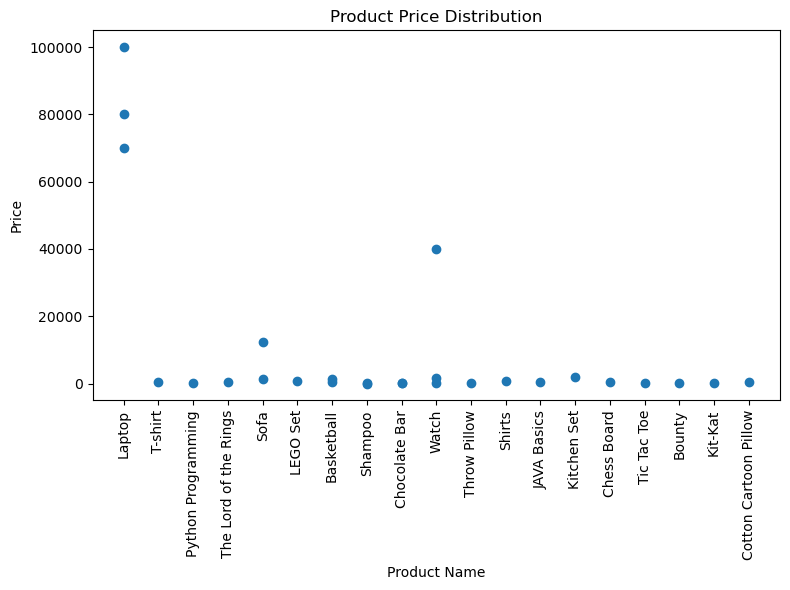

In [44]:


# 1. Product Name vs. Price (Scatter Plot)
plt.figure(figsize=(8, 6))  # Set figure size for readability
plt.scatter(data['product_name'],data['price'])  # Scatter plot
plt.xlabel('Product Name')
plt.ylabel('Price')
plt.title('Product Price Distribution')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability with long names
plt.tight_layout()  # Adjust spacing for better layout
plt.show()


By this Scatter plot we can see Watch sofa and Laptop has a Higher price and Other products are comeritavily low.

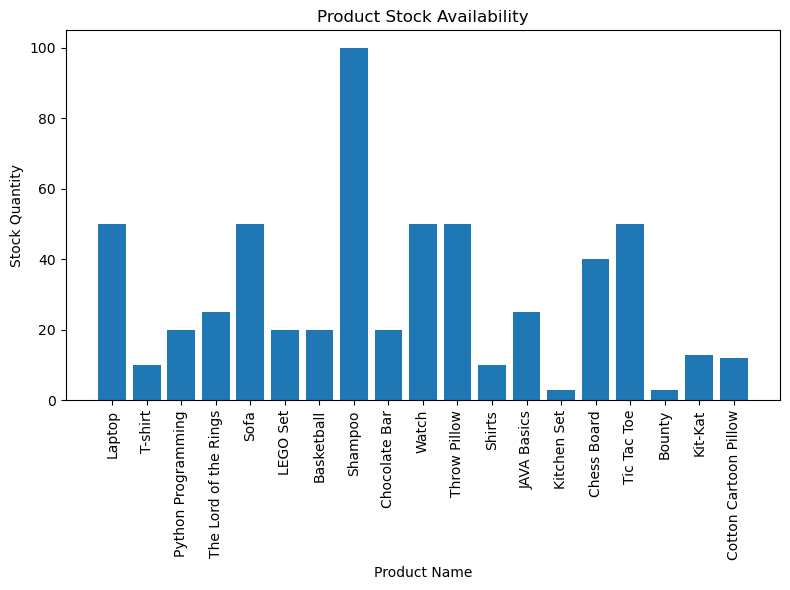

In [45]:

# 2. Product Name vs. Stock Quantity (Bar Chart)
plt.figure(figsize=(8, 6))
plt.bar(data['product_name'], data['stock_quantity'])  # Bar chart
plt.xlabel('Product Name')
plt.ylabel('Stock Quantity')
plt.title('Product Stock Availability')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Here In the Graph we can see kitchen-set, Bounty has least amount of Stock and shampoo is the Highest.

In [46]:
data = pd.read_sql("select * from ecommerce.orders",conn)

In [47]:
data = pd.DataFrame(data)

In [48]:
data.head()

,order_id,customer_id,order_date,total_amount,status
0,1,1,2024-01-05,1429.99,delivered
1,2,1,2023-07-10,4529.99,delivered
2,3,2,2024-03-06,2999.99,shipped
3,4,2,2023-01-05,4529.99,delivered
4,5,1,2024-03-05,1429.99,pending


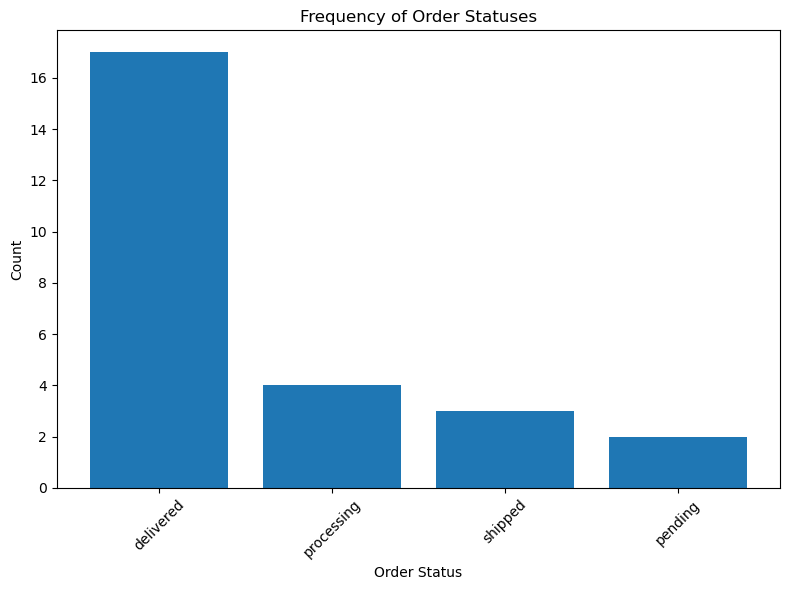

In [49]:
status_counts = data['status'].value_counts()

# Create a count plot
plt.figure(figsize=(8, 6))
plt.bar(status_counts.index, status_counts.values)  # Plot bar chart
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.title('Frequency of Order Statuses')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

 As we can More than 65% Oders has been Mark as delivered.

# conclusion

Benefits of Integrating SQL with Python:

* Data Retrieval: Fetch specific data from databases into your Python environment for analyis and visualization.
* Data Storage: Store data generated or processed in Python directly into databases for persistence and sharing.
* Data Manipulation: Update or delete records in the database based on conditions or calculations performed in Python.
* Automation: Automate database tasks using Python scripts, improving efficiency and reducing manual effort.